#Check GPU available

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Data Analysis & Preprocessing

## Step 1 - Data Loading

The dataset [ LamaH-CE_daily](https://zenodo.org/record/5153305/files/2_LamaH-CE_daily.tar.gz?download=1) was locally sampled, due to the memory constraints. The sampled dataset is loaded as a .zip file, and later extracted.

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/ID_10.csv       
  inflating: dataset/ID_110.csv      
  inflating: dataset/ID_114.csv      
  inflating: dataset/ID_156.csv      
  inflating: dataset/ID_157.csv      
  inflating: dataset/ID_165.csv      
  inflating: dataset/ID_178.csv      
  inflating: dataset/ID_184.csv      
  inflating: dataset/ID_186.csv      
  inflating: dataset/ID_222.csv      
  inflating: dataset/ID_234.csv      
  inflating: dataset/ID_242.csv      
  inflating: dataset/ID_244.csv      
  inflating: dataset/ID_27.csv       
  inflating: dataset/ID_278.csv      
  inflating: dataset/ID_282.csv      
  inflating: dataset/ID_289.csv      
  inflating: dataset/ID_290.csv      
  inflating: dataset/ID_294.csv      
  inflating: dataset/ID_299.csv      
  inflating: dataset/ID_310.csv      
  inflating: dataset/ID_321.csv      
  inflating: dataset/ID_322.csv      
  inflating: dataset/ID_328.csv      
  inflating: dataset/ID_330.csv      
  infl

In [1]:
import pandas as pd
import os
df = pd.DataFrame()
for file in os.listdir("dataset/"):
  df_tmp = pd.read_csv("dataset/"+file, sep = ";")
  df_tmp["gauge_id"] = int(file.split(".")[0].split("_")[1])
  df = pd.concat([df,df_tmp], ignore_index = True)

print(df.head())

   YYYY  MM  DD  DOY  2m_temp_max  2m_temp_mean  2m_temp_min  2m_dp_temp_max  \
0  1981   1   1    1         -2.5          -5.4         -9.4            -4.2   
1  1981   1   2    2         -2.9          -4.5         -5.9            -4.6   
2  1981   1   3    3          1.8          -0.7         -2.8             0.1   
3  1981   1   4    4          1.5          -1.3         -4.7             0.2   
4  1981   1   5    5         -5.4          -6.3         -7.2            -7.1   

   2m_dp_temp_mean  2m_dp_temp_min  ...  surf_net_solar_rad_max  \
0             -8.2           -13.5  ...                      94   
1             -6.3            -7.3  ...                      61   
2             -3.1            -5.0  ...                      68   
3             -2.1            -5.9  ...                      24   
4             -7.9            -9.0  ...                      79   

   surf_net_solar_rad_mean  surf_net_therm_rad_max  surf_net_therm_rad_mean  \
0                       13           

## Step 2 - Null Value Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424400 entries, 0 to 1424399
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   YYYY                     1424400 non-null  int64  
 1   MM                       1424400 non-null  int64  
 2   DD                       1424400 non-null  int64  
 3   DOY                      1424400 non-null  int64  
 4   2m_temp_max              1424400 non-null  float64
 5   2m_temp_mean             1424400 non-null  float64
 6   2m_temp_min              1424400 non-null  float64
 7   2m_dp_temp_max           1424400 non-null  float64
 8   2m_dp_temp_mean          1424400 non-null  float64
 9   2m_dp_temp_min           1424400 non-null  float64
 10  10m_wind_u               1424400 non-null  float64
 11  10m_wind_v               1424400 non-null  float64
 12  fcst_alb                 1424400 non-null  float64
 13  lai_high_veg             1424400 non-null 

In [3]:
df.isnull().sum()

YYYY                       0
MM                         0
DD                         0
DOY                        0
2m_temp_max                0
2m_temp_mean               0
2m_temp_min                0
2m_dp_temp_max             0
2m_dp_temp_mean            0
2m_dp_temp_min             0
10m_wind_u                 0
10m_wind_v                 0
fcst_alb                   0
lai_high_veg               0
lai_low_veg                0
swe                        0
surf_net_solar_rad_max     0
surf_net_solar_rad_mean    0
surf_net_therm_rad_max     0
surf_net_therm_rad_mean    0
surf_press                 0
total_et                   0
prec                       0
volsw_123                  0
volsw_4                    0
gauge_id                   0
dtype: int64

The dataset doesn't contain None, NA and other formal marks for missing values. Since all columns are numeric and no palceholder values were present, no additional missing-value cleaning was required.

In [4]:
df.describe()


,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4,gauge_id
count,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,...,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06
mean,2.000000e+03,6.523168e+00,1.572894e+01,1.831156e+02,1.035173e+01,6.216180e+00,2.108277e+00,4.845897e+00,2.521794e+00,2.091667e-02,...,3.749061e+02,1.106735e+02,8.167603e+01,4.933235e+01,9.099415e+04,1.511559e+00,3.310373e+00,3.657362e-01,3.892732e-01,4.623300e+02
std,1.125407e+01,3.448639e+00,8.799800e+00,1.054331e+02,8.983718e+00,8.502150e+00,8.194964e+00,7.805372e+00,8.017046e+00,8.477896e+00,...,1.970900e+02,7.247440e+01,2.674597e+01,2.207632e+01,5.846044e+03,1.353567e+00,5.575126e+00,6.257798e-02,5.613992e-02,2.307060e+02
min,1.981000e+03,1.000000e+00,1.000000e+00,1.000000e+00,-2.490000e+01,-3.040000e+01,-3.790000e+01,-3.480000e+01,-3.770000e+01,-4.180000e+01,...,4.000000e+00,1.000000e+00,-1.800000e+01,-3.000000e+01,7.070400e+04,-1.820000e+00,0.000000e+00,1.500000e-01,2.200000e-01,1.000000e+01
25%,1.990000e+03,4.000000e+00,8.000000e+00,9.200000e+01,3.400000e+00,1.000000e-01,-3.100000e+00,-6.000000e-01,-2.800000e+00,-5.300000e+00,...,2.000000e+02,4.500000e+01,6.500000e+01,3.300000e+01,8.914500e+04,2.800000e-01,4.000000e-02,3.300000e-01,3.600000e-01,2.977500e+02
50%,2.000000e+03,7.000000e+00,1.600000e+01,1.830000e+02,1.050000e+01,6.400000e+00,2.300000e+00,5.300000e+00,3.000000e+00,7.000000e-01,...,3.610000e+02,9.700000e+01,8.400000e+01,5.000000e+01,9.306000e+04,1.140000e+00,8.900000e-01,3.700000e-01,3.900000e-01,4.275000e+02
75%,2.010000e+03,1.000000e+01,2.300000e+01,2.740000e+02,1.740000e+01,1.300000e+01,8.500000e+00,1.100000e+01,8.800000e+00,6.600000e+00,...,5.460000e+02,1.700000e+02,1.010000e+02,6.600000e+01,9.490500e+04,2.620000e+00,4.310000e+00,4.000000e-01,4.100000e-01,6.877500e+02
max,2.019000e+03,1.200000e+01,3.100000e+01,3.660000e+02,3.690000e+01,2.970000e+01,2.380000e+01,2.570000e+01,2.110000e+01,2.000000e+01,...,8.330000e+02,3.060000e+02,1.920000e+02,1.190000e+02,1.012320e+05,8.680000e+00,1.239700e+02,7.300000e-01,7.300000e-01,8.730000e+02


The distribution is presented to see if any numerical value is used to mark missing values. There are no extreme values detected, that would be used in this purpose.

## Step 3 - Statistical Analysis

In [5]:
print(df.columns)

Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min',
       '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u',
       '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'prec', 'volsw_123', 'volsw_4', 'gauge_id'],
      dtype='object')


### Columns grouping

Columns are grouped by their meaning, to make data visualization more meaningful. We find columns related to time, temperature and atmosphere, raditaion and vegetation, and hydrology.

In [6]:
time_columns = ["YYYY","MM","DD","DOY"]
temp_atm_columns = ['2m_temp_max', '2m_temp_mean', '2m_temp_min',
       '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min','10m_wind_u',
       '10m_wind_v','surf_press']
rad_veg_columns = ['surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean','fcst_alb','lai_high_veg', 'lai_low_veg']
hyd_columns = ["prec","swe","total_et","volsw_123","volsw_4"]


In [7]:
df_grouped = df.groupby("gauge_id")

### Statics per column type

In [8]:
grouped_stat = df.groupby("gauge_id")[temp_atm_columns].agg(['mean'])
print(grouped_stat.describe())

      2m_temp_max 2m_temp_mean 2m_temp_min 2m_dp_temp_max 2m_dp_temp_mean  \
             mean         mean        mean           mean            mean   
count  100.000000   100.000000  100.000000     100.000000      100.000000   
mean    10.351730     6.216180    2.108277       4.845897        2.521794   
std      2.969532     3.079791    3.216102       2.732911        2.833694   
min      1.660706    -2.386521   -6.702373      -3.810236       -6.266786   
25%      9.795954     5.162374    0.347274       4.651832        1.961063   
50%     11.290993     7.506799    3.622574       5.914389        3.759846   
75%     12.317144     8.207761    4.182631       6.645398        4.393724   
max     14.176839    10.184829    6.084499       7.461766        5.324319   

      2m_dp_temp_min  10m_wind_u  10m_wind_v    surf_press  
                mean        mean        mean          mean  
count     100.000000  100.000000  100.000000    100.000000  
mean        0.020917    0.482930    0.047768  

In [9]:
grouped_stat = df.groupby("gauge_id")[rad_veg_columns].agg(['mean'])
print(grouped_stat.describe())


      surf_net_solar_rad_max surf_net_solar_rad_mean surf_net_therm_rad_max  \
                        mean                    mean                   mean   
count             100.000000              100.000000             100.000000   
mean              374.906141              110.673524              81.676031   
std                28.676587                8.117939               5.628863   
min               234.820837               70.567256              62.386619   
25%               371.684481              109.492506              79.946083   
50%               382.920914              112.617418              82.137321   
75%               389.701980              114.999087              85.768376   
max               410.678040              120.210755              91.693064   

      surf_net_therm_rad_mean    fcst_alb lai_high_veg lai_low_veg  
                         mean        mean         mean        mean  
count              100.000000  100.000000   100.000000  100.000000  
me

In [10]:
grouped_stat = df.groupby("gauge_id")[hyd_columns].agg(['mean'])
print(grouped_stat.describe())


             prec          swe    total_et   volsw_123     volsw_4
             mean         mean        mean        mean        mean
count  100.000000   100.000000  100.000000  100.000000  100.000000
mean     3.310373    99.685907    1.511559    0.365736    0.389273
std      0.826625   333.193693    0.315201    0.052747    0.053648
min      1.906841     2.097208    0.585862    0.237849    0.264290
25%      2.656732     6.032379    1.498782    0.348389    0.369538
50%      3.263652    12.161752    1.587931    0.366726    0.387838
75%      3.941935    70.070069    1.728848    0.378203    0.402846
max      5.266863  2659.040642    1.907793    0.619643    0.660439


### Distribution per column type - barchart visualization

In [11]:
import matplotlib.pyplot as plt

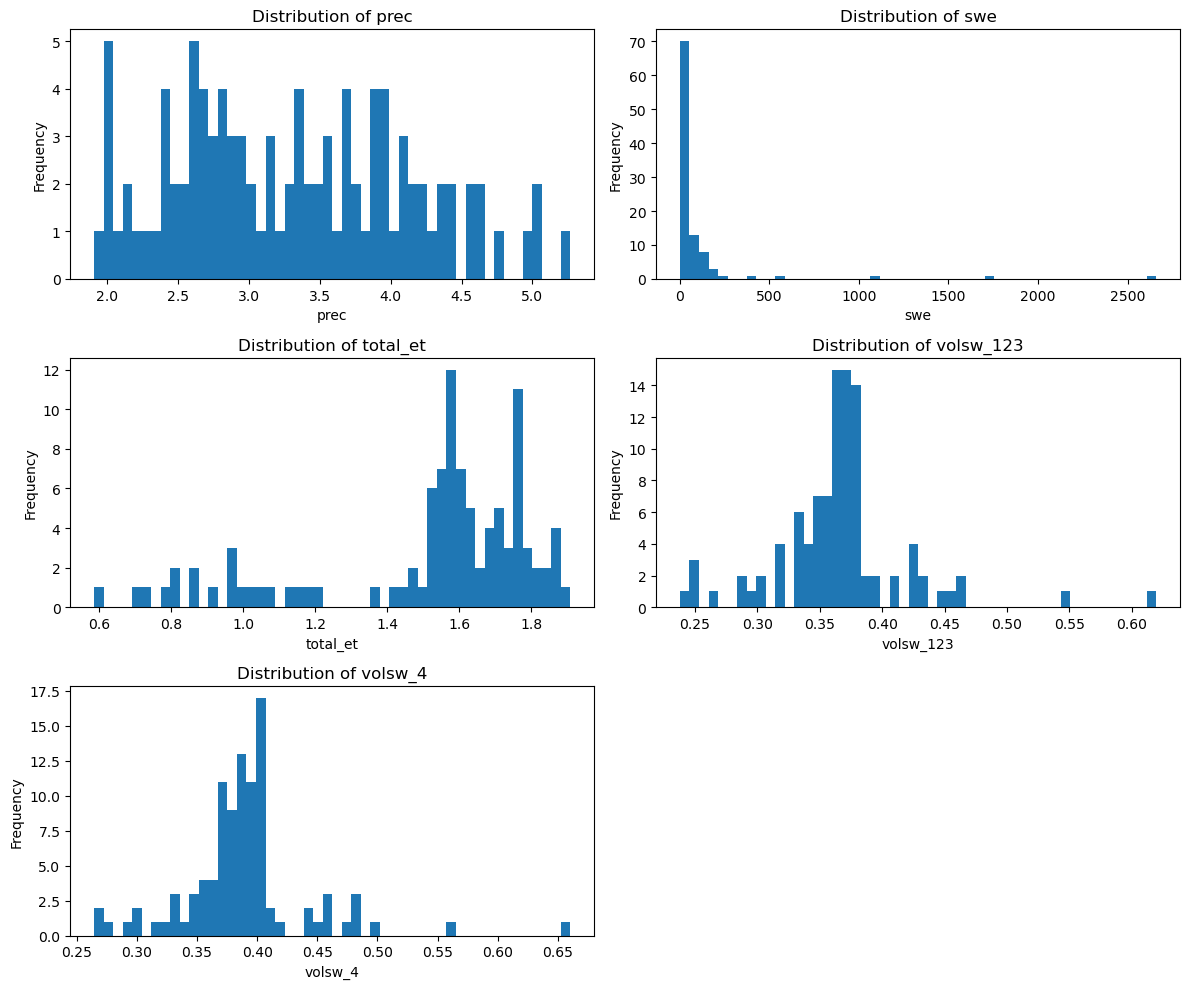

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(hyd_columns):
    axes[i].hist(df.groupby("gauge_id")[col].mean(), bins=50)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")


axes[-1].axis("off")

plt.tight_layout()
plt.show()

swe - hihgly clustered at the low end with a long tail -> logarithmic transformation

total_et - shows distrinct peaks -> Yeo-Johnson Power transformation


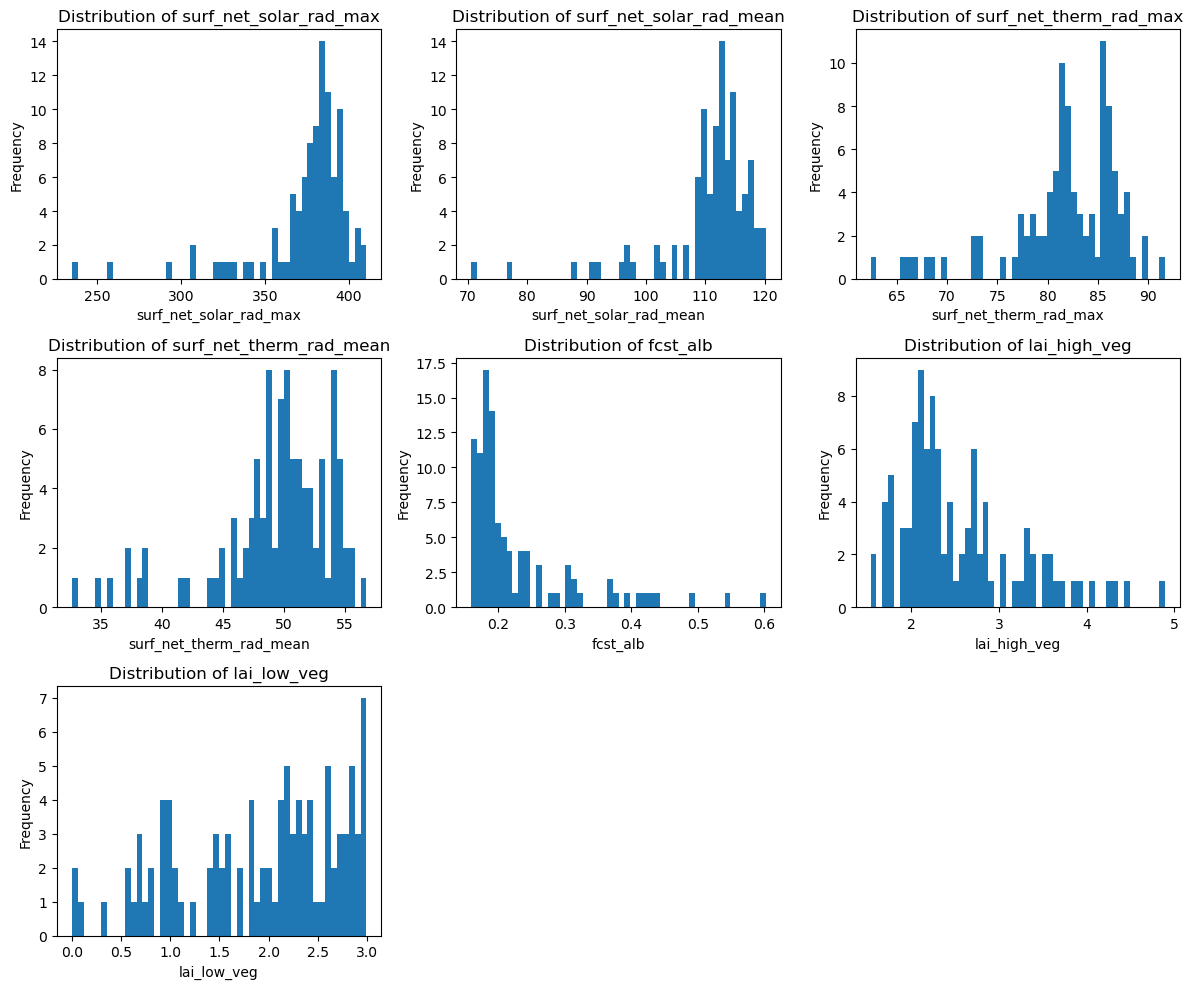

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(rad_veg_columns):
    axes[i].hist(df.groupby("gauge_id")[col].mean(), bins=50)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

axes[-2].axis("off")
axes[-1].axis("off")

plt.tight_layout()
plt.show()

fcst_alb - hihgly clustered at the low end with a long tail -> logarithmic transformation

surf_net_therm_rad_mean - shows distrinct peaks -> Yeo-Johnson Power transformation

lai_high_veg - clustered on the left -> Yeo-Johnson Power transformation


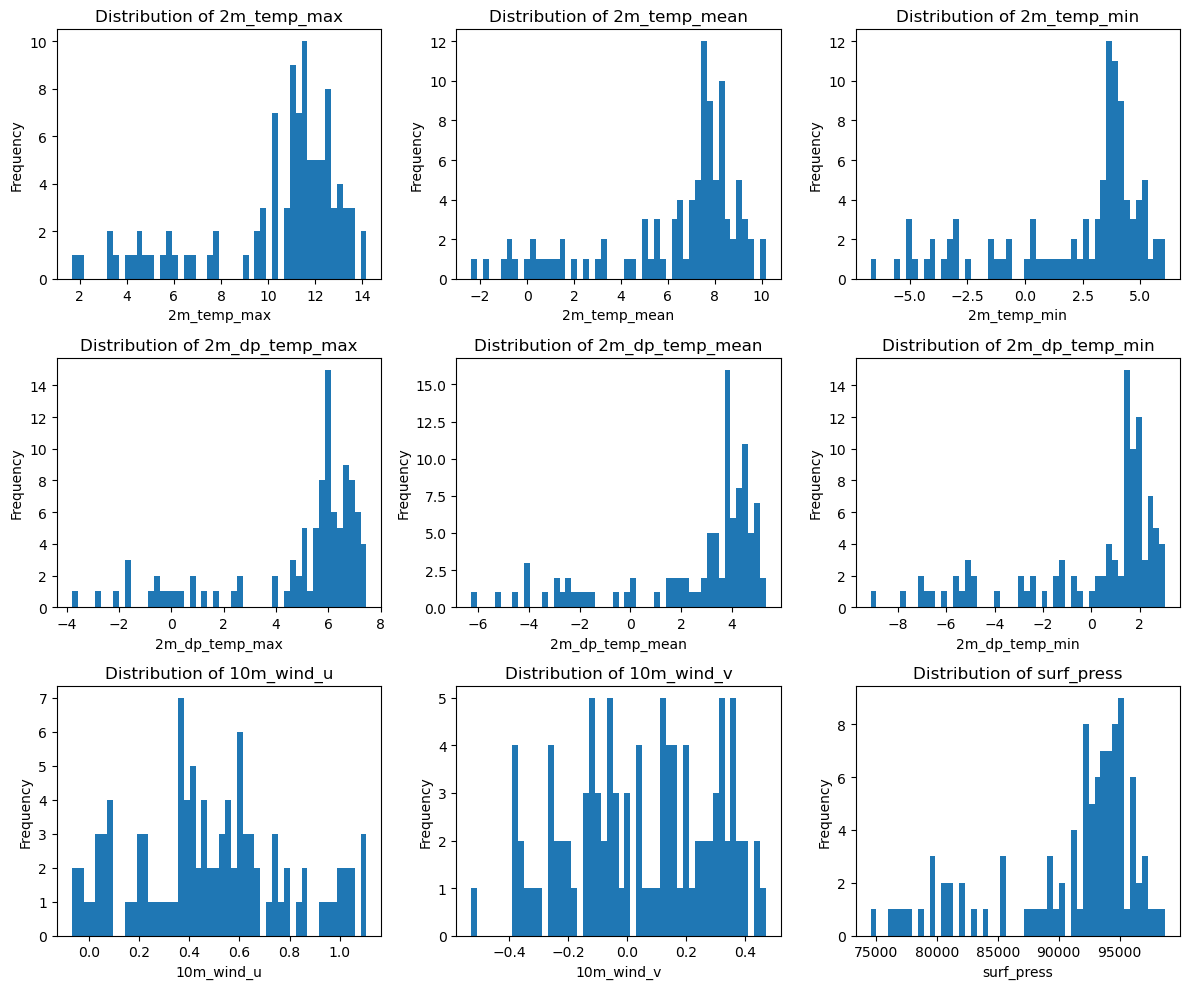

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(temp_atm_columns):
    axes[i].hist(df.groupby("gauge_id")[col].mean(), bins=50)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

2m_dp_temp_max, 2m_dp_temp_mean - clustered on the left -> Yeo-Johnson Power transformation

### Distribution per column type - boxplot visualization

In [15]:
import seaborn as sns

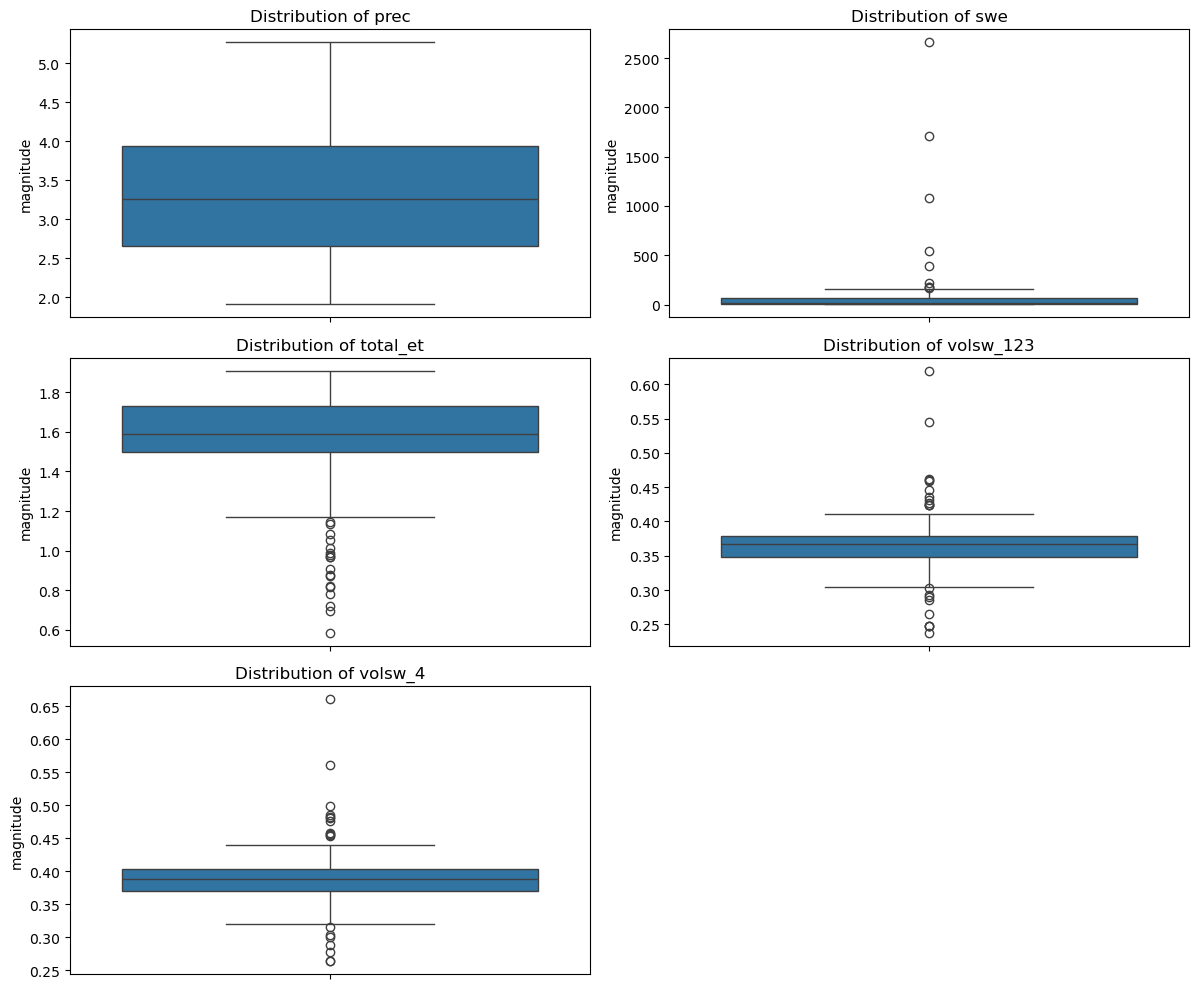

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(hyd_columns):
    sns.boxplot(y = df.groupby("gauge_id")[col].mean(),ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("magnitude")



axes[-1].axis("off")

plt.tight_layout()
plt.show()

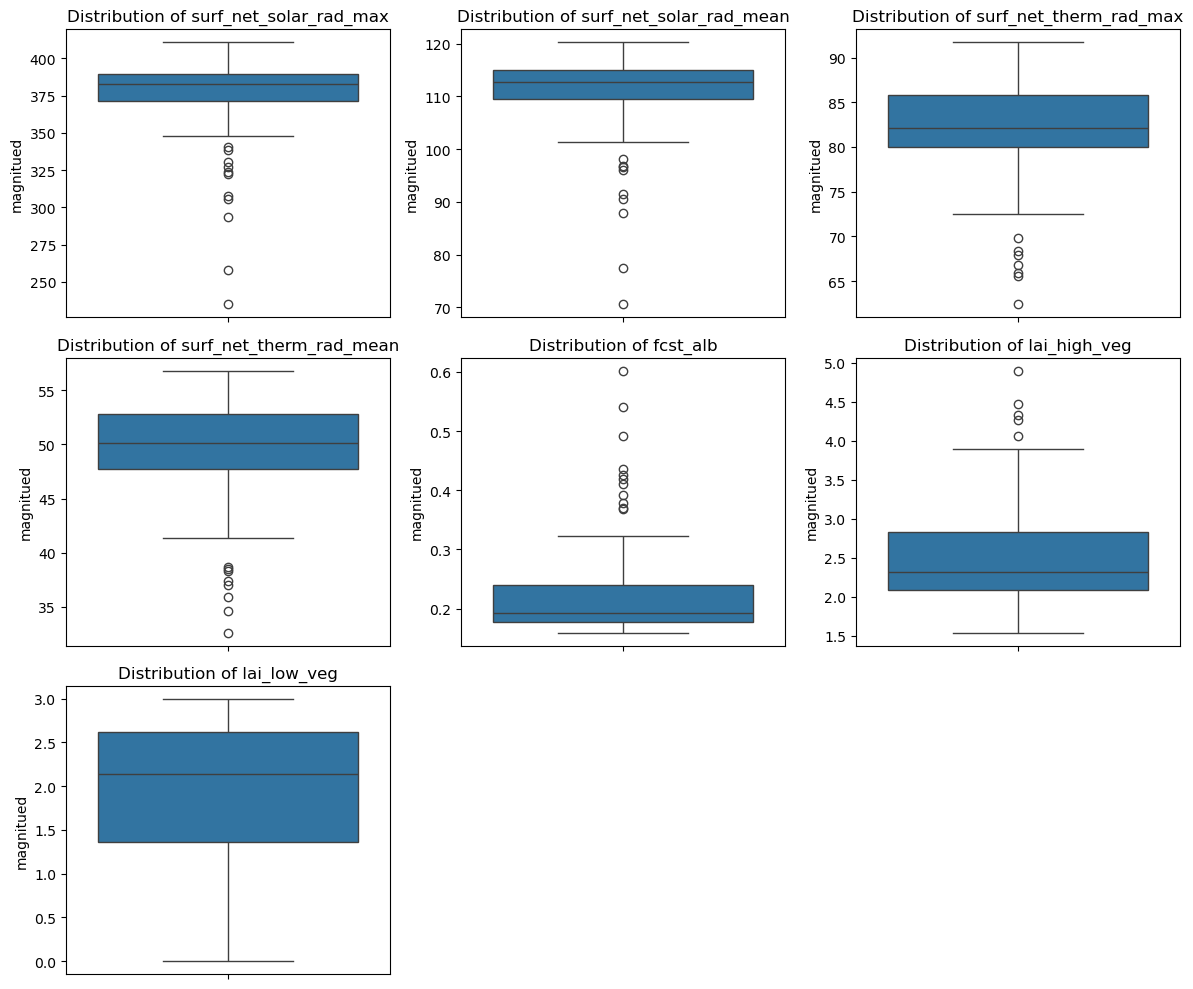

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(rad_veg_columns):
    sns.boxplot(y = df.groupby("gauge_id")[col].mean(),ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("magnitued")

axes[-2].axis("off")
axes[-1].axis("off")

plt.tight_layout()
plt.show()

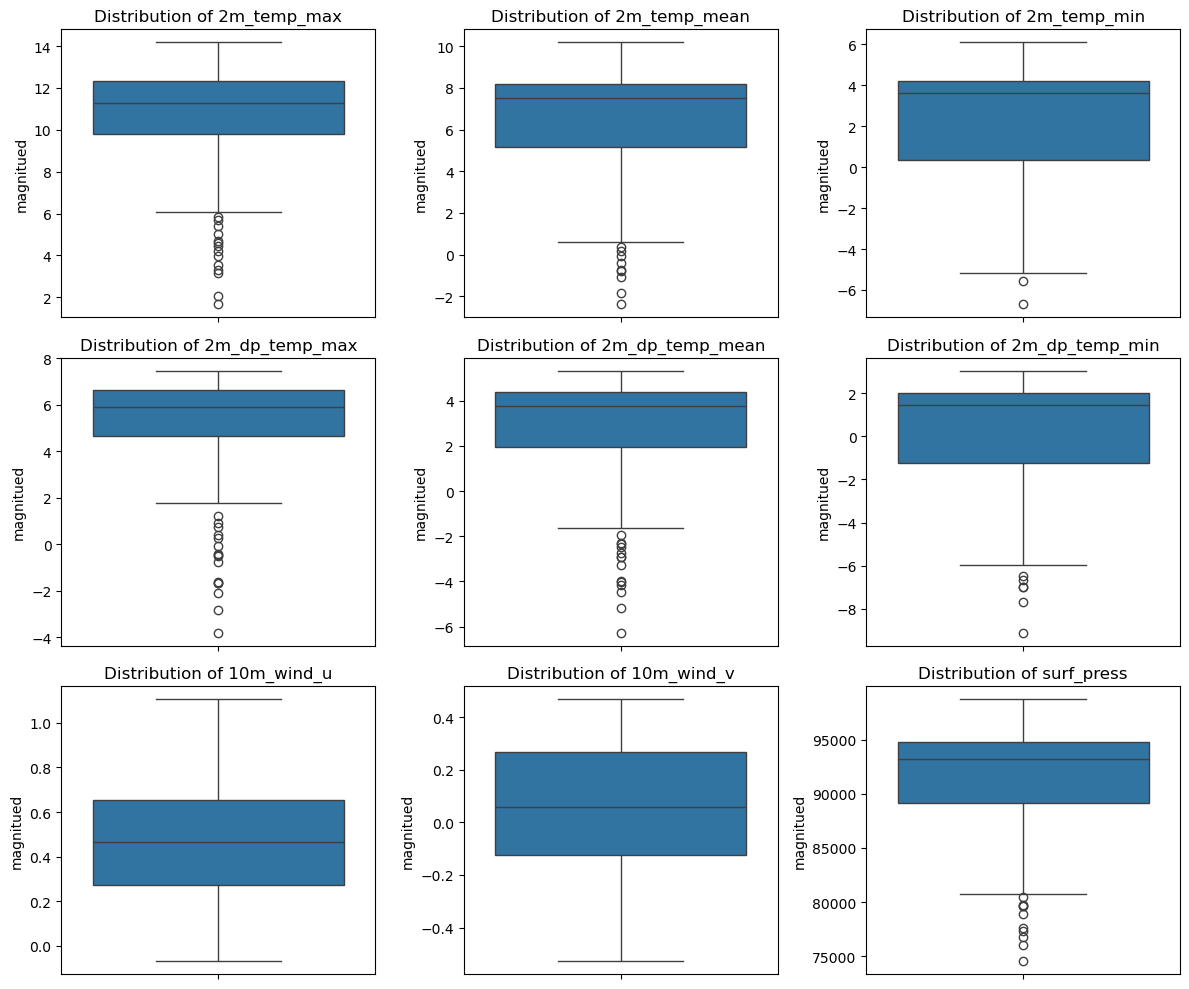

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(temp_atm_columns):
    sns.boxplot(y = df.groupby("gauge_id")[col].mean(),ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("magnitued")

plt.tight_layout()
plt.show()

### Correlations

In [20]:
df.columns

Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min',
       '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u',
       '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'prec', 'volsw_123', 'volsw_4', 'gauge_id'],
      dtype='object')

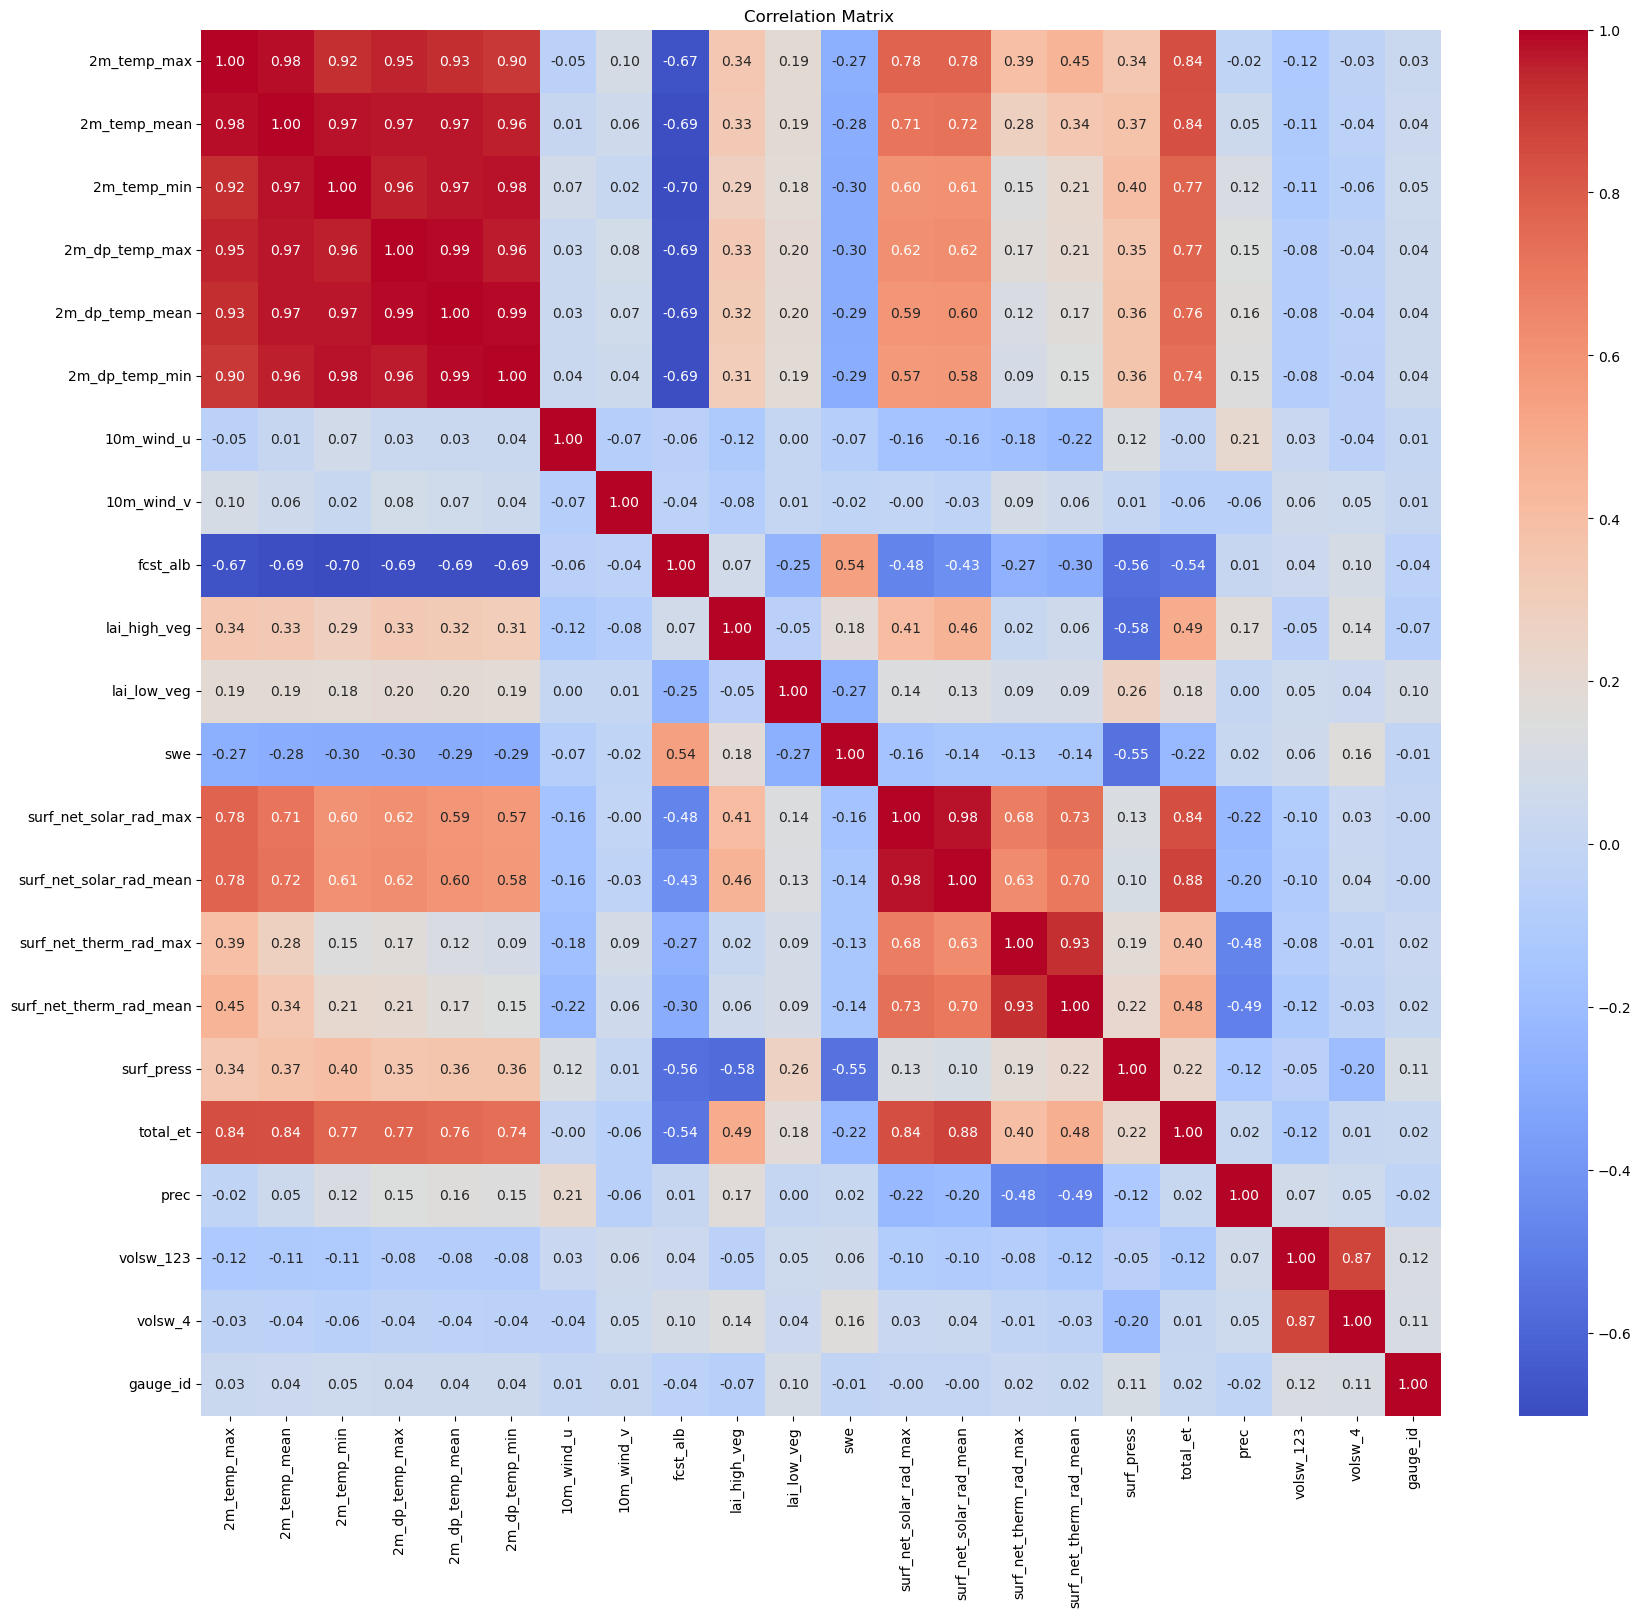

In [21]:
import seaborn as sns
corr_vars = df.columns.tolist()
for col in time_columns:
  corr_vars.remove(col)
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix ")
plt.show()

## Step 4 - Data Preprocessing

According to the correlation matrix plot some extreme correlations can be seen as can be expected:
* 2m_temp(mean, max, min) - keeping mean.
* 2m_dp_temp(mean, max, min) - keeping mean.
* surf_net_solar_rad(mean, max) - keeping mean.
* surf_net_therm_rad(mean, max) - keeping mean.

In [22]:
col_to_drop = ["2m_temp_max","2m_temp_min","2m_dp_temp_max","2m_dp_temp_min","surf_net_therm_rad_max","surf_net_solar_rad_max"]

In [23]:
df.head()

,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4,gauge_id
0,1981,1,1,1,-2.5,-5.4,-9.4,-4.2,-8.2,-13.5,...,94,13,45,17,89347.0,-0.09,9.01,0.33,0.4,10
1,1981,1,2,2,-2.9,-4.5,-5.9,-4.6,-6.3,-7.3,...,61,12,21,9,89281.0,0.00,17.03,0.33,0.4,10
2,1981,1,3,3,1.8,-0.7,-2.8,0.1,-3.1,-5.0,...,68,15,27,6,88319.0,0.09,16.81,0.33,0.4,10
3,1981,1,4,4,1.5,-1.3,-4.7,0.2,-2.1,-5.9,...,24,5,75,17,87638.0,0.30,37.99,0.33,0.4,10
4,1981,1,5,5,-5.4,-6.3,-7.2,-7.1,-7.9,-9.0,...,79,15,60,23,88511.0,0.41,17.99,0.33,0.4,10


In [24]:
df = df.drop(col_to_drop,axis = 1)

#### Transformation of columns

In [25]:
import numpy as np
df["swe"] = np.log1p(df["swe"])
df["fcst_alb"] = np.log1p(df['fcst_alb'])
#df["prec"] = np.log1p(df["prec"])

In [26]:
from sklearn.preprocessing import PowerTransformer

yeo_johnson_cols = [
    '2m_dp_temp_mean',
    'lai_high_veg',
    'surf_net_therm_rad_mean',
    'total_et'
]

pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_to_transform = df[yeo_johnson_cols].copy()
transformed_array = pt.fit_transform(df_to_transform)
df.loc[:, yeo_johnson_cols] = transformed_array

C:\Users\aleks\AppData\Local\Temp\ipykernel_23136\3822731358.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.47764864 -1.87035213 -2.02269708 ...  0.49272339 -0.44999459
 -0.31354851]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, yeo_johnson_cols] = transformed_array


In [27]:
df.head()

,YYYY,MM,DD,DOY,2m_temp_mean,2m_dp_temp_mean,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,lai_low_veg,swe,surf_net_solar_rad_mean,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4,gauge_id
0,1981,1,1,1,-5.4,-1.293733,0.8,0.6,0.392042,0.231052,1.8,5.164272,13,-1.477649,89347.0,-1.586792,9.01,0.33,0.4,10
1,1981,1,2,2,-4.5,-1.097353,0.4,1.1,0.398776,0.231052,1.8,5.233939,12,-1.870352,89281.0,-1.408879,17.03,0.33,0.4,10
2,1981,1,3,3,-0.7,-0.757129,0.5,1.4,0.398776,0.231052,1.8,5.308169,15,-2.022697,88319.0,-1.246657,16.81,0.33,0.4,10
3,1981,1,4,4,-1.3,-0.647221,1.1,-0.1,0.398776,0.231052,1.8,5.440858,5,-1.477649,87638.0,-0.917437,37.99,0.33,0.4,10
4,1981,1,5,5,-6.3,-1.262942,1.7,-0.6,0.398776,0.231052,1.8,5.542439,15,-1.191502,88511.0,-0.766755,17.99,0.33,0.4,10


### Temporal division of dataset

In [28]:
df["date"] = pd.to_datetime(
    df.rename(columns={"YYYY": "year", "MM": "month", "DD": "day"})[["year","month","day"]]
)


In [29]:
print(df.sort_values(by = ["date","gauge_id"]))


         YYYY  MM  DD  DOY  2m_temp_mean  2m_dp_temp_mean  10m_wind_u  \
0        1981   1   1    1          -5.4        -1.293733         0.8   
185172   1981   1   1    1          -3.1        -0.981968         2.8   
911616   1981   1   1    1          -9.8        -1.886691         0.9   
1239228  1981   1   1    1         -11.5        -2.171358         0.4   
1267716  1981   1   1    1         -10.6        -2.083404         0.4   
...       ...  ..  ..  ...           ...              ...         ...   
1338935  2019  12  31  365          -8.9        -2.004935        -0.3   
1353179  2019  12  31  365           0.5        -0.735323         2.7   
1367423  2019  12  31  365          -0.6        -0.843602         1.2   
1381667  2019  12  31  365          -0.4        -0.843602         1.2   
1395911  2019  12  31  365           1.9        -0.746236         3.3   

         10m_wind_v  fcst_alb  lai_high_veg  ...       swe  \
0               0.6  0.392042      0.231052  ...  5.164272   

### Creating Train-Validation-Test splits

In [30]:
full_time_span = df['date'].max() - df['date'].min()
split_date_train = df['date'].min() + (0.70 * full_time_span)
split_date_val = df['date'].min() + (0.85 * full_time_span)

In [31]:
train_df = df[df['date'] <= split_date_train].copy()
val_df = df[(df['date'] > split_date_train) & (df['date'] <= split_date_val)].copy()
test_df = df[df['date'] > split_date_val].copy()

In [32]:
print(split_date_train)
print(split_date_val)

2008-04-19 02:24:00
2014-02-23 13:12:00


In [33]:
cols_x = df.columns.tolist()
label = 'prec'
cols_x.remove(label)

X_train = train_df[cols_x].copy()
y_train = train_df[label].copy()

X_val = val_df[cols_x].copy()
y_val = val_df[label].copy()

X_test = test_df[cols_x].copy()
y_test = test_df[label].copy()

In [34]:
print(X_train['gauge_id'].unique(),X_test['gauge_id'].unique(),)

[ 10 110 114 156 157 165 178 184 186 222 234 242 244  27 278 282 289 290
 294 299 310 321 322 328 330 331 340 343 345 351 352 354 357 363 377 378
 379 383 384 397 404 405 415 416 439 471 474 478 486 487 500 511 524 525
 528 545 565 583 584 592 593 628 643 646  66 660 664 670 685 686 693 696
 697 699 700 709 716 721 731 735 742 743 747 752 755 759 760  79 790  80
 800 807  81 814 826 831 833 873  89  96] [ 10 110 114 156 157 165 178 184 186 222 234 242 244  27 278 282 289 290
 294 299 310 321 322 328 330 331 340 343 345 351 352 354 357 363 377 378
 379 383 384 397 404 405 415 416 439 471 474 478 486 487 500 511 524 525
 528 545 565 583 584 592 593 628 643 646  66 660 664 670 685 686 693 696
 697 699 700 709 716 721 731 735 742 743 747 752 755 759 760  79 790  80
 800 807  81 814 826 831 833 873  89  96]


### Scaling values

In [35]:
col_to_normalize = df.columns.tolist()
col_to_normalize.remove("YYYY")
col_to_normalize.remove("MM")
col_to_normalize.remove("DD")
col_to_normalize.remove("DOY")
col_to_normalize.remove("date")
col_to_normalize.remove("gauge_id")
col_to_normalize.remove("prec")
print(col_to_normalize)

['2m_temp_mean', '2m_dp_temp_mean', '10m_wind_u', '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe', 'surf_net_solar_rad_mean', 'surf_net_therm_rad_mean', 'surf_press', 'total_et', 'volsw_123', 'volsw_4']


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[col_to_normalize] = scaler.fit_transform(X_train[col_to_normalize])
X_val[col_to_normalize] = scaler.transform(X_val[col_to_normalize])
X_test[col_to_normalize] = scaler.transform(X_test[col_to_normalize])

#### Save to csv

In [37]:
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [39]:
# from google.colab import files

# files.download("X_train.csv")
# files.download("y_train.csv")
# files.download("X_val.csv")
# files.download("y_val.csv")
# files.download("X_test.csv")
# files.download("y_test.csv")


In [38]:
X_train.head()

,YYYY,MM,DD,DOY,2m_temp_mean,2m_dp_temp_mean,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,lai_low_veg,swe,surf_net_solar_rad_mean,surf_net_therm_rad_mean,surf_press,total_et,volsw_123,volsw_4,gauge_id,date
0,1981,1,1,1,-1.329826,-1.254394,0.186711,0.503114,1.722837,0.238358,-0.142487,1.474147,-1.347670,-1.487837,-0.283149,-1.569629,-0.570172,0.186673,10,1981-01-01
1,1981,1,2,2,-1.223878,-1.058070,-0.072733,0.967476,1.784071,0.238358,-0.142487,1.504638,-1.361637,-1.881778,-0.294429,-1.390978,-0.570172,0.186673,10,1981-01-02
2,1981,1,3,3,-0.776543,-0.717942,-0.007872,1.246094,1.784071,0.238358,-0.142487,1.537125,-1.319735,-2.034603,-0.458846,-1.228083,-0.570172,0.186673,10,1981-01-03
3,1981,1,4,4,-0.847175,-0.608065,0.381295,-0.146993,1.784071,0.238358,-0.142487,1.595199,-1.459407,-1.487837,-0.575238,-0.897497,-0.570172,0.186673,10,1981-01-04
4,1981,1,5,5,-1.435773,-1.223612,0.770462,-0.611356,1.784071,0.238358,-0.142487,1.639657,-1.319735,-1.200789,-0.426031,-0.746190,-0.570172,0.186673,10,1981-01-05


In [39]:
X_train.columns

Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_mean', '2m_dp_temp_mean',
       '10m_wind_u', '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg',
       'swe', 'surf_net_solar_rad_mean', 'surf_net_therm_rad_mean',
       'surf_press', 'total_et', 'volsw_123', 'volsw_4', 'gauge_id', 'date'],
      dtype='object')

### Creating dataset version with lags

In [40]:
lags = [1,3,7]

def add_local_lags(X_df,y_df,lags):
  df_temp = X_df.copy()
  df_temp['prec'] = y_df
  df_temp.sort_values(by = ['gauge_id','date'],inplace = True)
  for lag in lags:
    df_temp[f'prec_{lag}'] = df_temp.groupby('gauge_id')['prec'].shift(lag)
  df_temp.sort_values(by = ['date','gauge_id'],inplace = True)
  y_lagged = df_temp['prec']
  X_lagged = df_temp.drop(columns=['prec'])

  return X_lagged,y_lagged
X_train_lagged, y_train_lagged = add_local_lags(X_train, y_train, lags)
X_val_lagged, y_val_lagged = add_local_lags(X_val, y_val, lags)
X_test_lagged, y_test_lagged = add_local_lags(X_test, y_test,lags)

In [41]:
impute_cols = ["prec_1","prec_3","prec_7"]
train_local_medians = X_train_lagged.groupby('gauge_id')[impute_cols].median()
median_maps = {}
for col in impute_cols:
    median_maps[col] = train_local_medians[col].to_dict()

def impute_with_train_median(df,median_maps,gauge_id_col = 'gauge_id'):
    df_imputed = df.copy()
    for col, map_dict in median_maps.items():
        median_map_series = df_imputed[gauge_id_col].map(map_dict)

        df_imputed[col] = df_imputed[col].fillna(median_map_series)

    return df_imputed
X_train_lagged = impute_with_train_median(X_train_lagged, median_maps)


X_val_lagged = impute_with_train_median(X_val_lagged, median_maps)


X_test_lagged = impute_with_train_median(X_test_lagged, median_maps)

In [42]:
X_test_lagged.head()

,YYYY,MM,DD,DOY,2m_temp_mean,2m_dp_temp_mean,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,...,surf_net_therm_rad_mean,surf_press,total_et,volsw_123,volsw_4,gauge_id,date,prec_1,prec_3,prec_7
12107,2014,2,24,55,-0.658823,-1.356478,-0.591623,0.874604,1.346513,0.238358,...,1.672162,-0.366896,-0.500580,-0.410607,0.008732,10,2014-02-24,1.43,1.43,1.430
197279,2014,2,24,55,-0.729455,-1.254394,-0.591623,0.688859,0.953939,-0.057147,...,1.845133,-0.203846,-0.444210,-0.091478,0.008732,27,2014-02-24,1.51,1.51,1.510
923723,2014,2,24,55,-1.753617,-2.063410,-0.461900,0.688859,2.374746,0.958921,...,1.411675,-2.089006,-1.280750,-0.570172,0.008732,66,2014-02-24,1.64,1.64,1.640
1251335,2014,2,24,55,-1.659441,-1.738213,-0.267317,0.781731,2.431757,1.289040,...,0.666044,-2.434761,-1.390978,3.418943,4.457269,79,2014-02-24,1.30,1.30,1.295
1279823,2014,2,24,55,-1.682985,-1.767993,-0.332178,0.874604,2.201537,0.958921,...,0.798521,-2.284187,-1.390978,0.706345,1.610205,80,2014-02-24,1.36,1.36,1.360


In [43]:
X_train_lagged.drop(['YYYY',"MM","DD","DOY","date","gauge_id"],axis = 1,inplace=True)
X_val_lagged.drop(['YYYY',"MM","DD","DOY","date","gauge_id"],axis = 1,inplace=True)
X_test_lagged.drop(['YYYY',"MM","DD","DOY","date","gauge_id"],axis = 1,inplace=True)

In [44]:
X_train.drop(['YYYY',"MM","DD","DOY","date","gauge_id"],axis = 1,inplace=True)
X_val.drop(['YYYY',"MM","DD","DOY","date","gauge_id"],axis = 1,inplace=True)
X_test.drop(['YYYY',"MM","DD","DOY","date","gauge_id"],axis = 1,inplace=True)

# Forecasting Models

## Helpers

### Train ARIMA

#### Define model

In [46]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

y_train_series = y_train.copy()
y_val_series = y_val.copy()
y_test_series = y_test.copy()


arima_order = (1, 1, 1) # (p, d, q)

arima_model = ARIMA(y_train_series, order=arima_order)

c:\Users\aleks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\aleks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\aleks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


#### Train

In [47]:
arima_model_fit = arima_model.fit()

#### Predict

In [48]:
y_pred_arima = arima_model_fit.predict(start=y_test_series.index[0], end=y_test_series.index[-1])


c:\Users\aleks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\aleks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [49]:
print(y_pred_arima)
print(y_train_series)
print(y_test_series)

12107      4.946221
12108      3.730501
12109      2.956550
12110      3.704814
12111      2.901282
             ...   
1424395    3.774489
1424396    3.774489
1424397    3.774489
1424398    3.774489
1424399    3.774489
Name: predicted_mean, Length: 1412293, dtype: float64
0           9.01
1          17.03
2          16.81
3          37.99
4          17.99
           ...  
1420122    10.51
1420123     5.41
1420124     1.75
1420125     3.46
1420126     6.34
Name: prec, Length: 997100, dtype: float64
12107      0.00
12108      0.00
12109      4.68
12110      6.71
12111      2.59
           ... 
1424395    8.13
1424396    0.35
1424397    0.00
1424398    0.00
1424399    0.00
Name: prec, Length: 213700, dtype: float64


### Evaluation helpers

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import json
import datetime

# --- 1. SETUP: ASSUME THESE VARIABLES EXIST ---
# y_test: The true target values (e.g., a NumPy array of shape (N, 1) or (N,))
# y_pred: The predicted values from model.predict(X_test_seq) (shape should match y_test)
# ----------------------------------------------
def generate_predictions_sequence(original_y_test_series, look_back = 0, prev_steps = 0):
    """
    Generates naive (t-1) predictions for sequence models.
    For a target y_t, the prediction is y_{t-1}.
    This aligns with how y_test_seq is created from original_y_test_series.
    """
    # y_test_seq was created from original_y_test_series.iloc[look_back:]
    # For y_test_seq[i] (which is original_y_test_series.iloc[look_back + i]),
    # the t-1 prediction is original_y_test_series.iloc[look_back + i - 1].
    # This corresponds to slicing the original series from (look_back - 1) up to (but not including) the last element.
    naive_preds = original_y_test_series.iloc[look_back - prev_steps : len(original_y_test_series) - prev_steps]
    return naive_preds.values

def evaluate(y_pred, y_test, prefix="model", results_dir='results', plot = False):
  # --- 2. CALCULATE NUMERICAL METRICS ---
  print(f"--- Numerical Regression Metrics ({prefix}) ---")

  # Ensure both are flattened to 1D arrays for scikit-learn metrics
  y_test_flat = np.array(y_test).flatten()
  y_pred_flat = np.array(y_pred).flatten()

  # Mean Squared Error (MSE)
  mse = mean_squared_error(y_test_flat, y_pred_flat)

  # Root Mean Squared Error (RMSE) - The most interpretable error metric
  rmse = np.sqrt(mse)

  # Mean Absolute Error (MAE) - Robust to outliers
  mae = mean_absolute_error(y_test_flat, y_pred_flat)

  # R-squared (R2) Score - Goodness of fit (closer to 1.0 is better)
  r2 = r2_score(y_test_flat, y_pred_flat)

  print(f"Mean Squared Error (MSE): {mse:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  print(f"Mean Absolute Error (MAE): {mae:.4f}")
  print(f"R-squared Score (R2): {r2:.4f}")
  print("-" * 40)

  # Save numerical metrics to JSON
  metrics = {
      "mse": mse,
      "rmse": rmse,
      "mae": mae,
      "r2": r2
  }
  timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
  json_filename = os.path.join(results_dir, f"evaluation_metrics_{prefix}_{timestamp}.json")
  with open(json_filename, 'w') as f:
      json.dump(metrics, f, indent=4)
  print(f"Numerical metrics saved to {json_filename}")


  if plot:
    # --- 3. VISUAL ANALYSIS: Plot True vs. Predicted ---
    # This plot is essential for time series to see if the model captures trends
    plt.figure(figsize=(12, 6))

    # Plot the true values
    plt.plot(y_test_flat, label='True Values', color='blue', linewidth=0.5)

    # Plot the predicted values
    plt.plot(y_pred_flat, label='Predicted Values', color='red', linestyle='--', linewidth=0.5)

    plt.title(f'True vs. Predicted Values (RMSE: {rmse:.4f}) ({prefix})')
    plt.xlabel('Time Step / Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    # Save the figure
    plot1_filename = os.path.join(results_dir, f"true_vs_predicted_{prefix}_{timestamp}.png")
    plt.savefig(plot1_filename)
    plt.show() # Display the plot
    print(f"True vs. Predicted plot saved to {plot1_filename}")
    plt.close() # Close the figure to free up memory


    # --- 4. VISUAL ANALYSIS: Plot Residuals ---
    # Residuals = Error = True - Predicted. They should be centered around zero.
    residuals = y_test_flat - y_pred_flat

    plt.figure(figsize=(12, 3))
    plt.plot(residuals, label='Residuals (Error)', color='green', linewidth=0.5)
    plt.axhline(0, color='red', linestyle='-') # Line at zero
    plt.title(f'Residual Plot (Errors Over Time) ({prefix})')
    plt.xlabel('Time Step / Sample Index')
    plt.ylabel('Residual Value (True - Predicted)')
    plt.legend()
    plt.grid(True)
    # Save the figure
    plot2_filename = os.path.join(results_dir, f"residuals_plot_{prefix}_{timestamp}.png")
    plt.savefig(plot2_filename)
    plt.show() # Display the plot
    print(f"Residuals plot saved to {plot2_filename}")
    plt.close() # Close the figure to free up memory

  return metrics


def compare_model_with_baselines(model_name, y_pred_model, y_test_target, y_pred_naive_baseline, y_pred_arima_baseline):
    """
    Evaluates a model's predictions and compares them against naive (t-1) and ARIMA baselines.

    Args:
        model_name (str): Name of the model being evaluated (e.g., 'LSTM', 'XGBoost').
        y_pred_model (np.ndarray): Predictions from the actual model (already inverse-transformed if necessary).
        y_test_target (np.ndarray): True target values corresponding to y_pred_model (already inverse-transformed if necessary).
        y_pred_naive_baseline (np.ndarray): Pre-computed naive (t-1) predictions (already inverse-transformed).
        y_pred_arima_baseline (np.ndarray): Pre-computed ARIMA predictions (already inverse-transformed).
    """
    # Create results directory
    results_dir = "results"
    os.makedirs(results_dir, exist_ok=True) # Ensure directory exists

    print(f"--- Evaluation for {model_name} ---")
    model_metrics = evaluate(y_pred_model, y_test_target, prefix=model_name.replace(' ', '_').lower(), results_dir=results_dir, plot=True)

    print(f"\n--- Comparing {model_name} with Baselines ---")

    print("--- Naive (t-1) Baseline Evaluation ---")
    naive_metrics = evaluate(y_pred_naive_baseline, y_test_target, prefix="naive_baseline", results_dir=results_dir)

    print("--- ARIMA Baseline Evaluation ---")
    arima_metrics = evaluate(y_pred_arima_baseline, y_test_target, prefix="arima_baseline", results_dir=results_dir, plot=True)

    # 2. Create a list of these metric dictionaries
    metrics_list = [model_metrics, arima_metrics, naive_metrics]

    # 4. Create a pandas DataFrame from the list of dictionaries
    metrics_df = pd.DataFrame(metrics_list)

    # 5. Add a new column named 'Model' to the DataFrame
    metrics_df['Model'] = [model_name, 'ARIMA', 'naive (t-1)']

    # Reorder columns to have 'Model' first for better readability
    metrics_df = metrics_df[['Model', 'mse', 'rmse', 'mae', 'r2']]
    metrics_df.transpose()

    print("\n--- Overall Performance Comparison ---")
    print(metrics_df.to_string(index=False))
    print("-" * 50)

    metrics_filename = os.path.join(results_dir, f"{model_name}_evaluation_metrics.csv")
    metrics_df.to_csv(f"metrics_{model_name.replace(' ', '_').lower()}.csv", index=False)
    print(f"{model_name} evaluation metrics saved to {metrics_filename}")


## Step 1 - Model

### Random Forest Regressor

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training. For regression, it outputs the mean prediction of the individual trees.

#### Define model

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

#### Train

In [52]:
rf_model.fit(X_train_lagged, y_train_lagged)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [53]:
import joblib
import os


model_filename = 'random_forest_prec_model.joblib'
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True) 
save_path = os.path.join(model_dir, model_filename)


joblib.dump(rf_model, save_path)



['saved_models\\random_forest_prec_model.joblib']

#### Predict

In [54]:
y_pred_rf = rf_model.predict(X_test_lagged)

#### Evaluate

In [65]:
target_index = y_test_lagged.index
y_arima_aligned = y_pred_arima.reindex(target_index)
arima_fallback_value = y_train_lagged.median() # Use y_train_lagged as the source
y_arima_aligned.fillna(arima_fallback_value, inplace=True)
y_arima_baseline = y_arima_aligned.values


In [66]:
print(len(y_pred_rf))
print( len(y_test_lagged))
print(len(y_arima_baseline))

213700
213700
213700


--- Evaluation for Random Forrest ---
--- Numerical Regression Metrics (random_forrest) ---
Mean Squared Error (MSE): 11.7162
Root Mean Squared Error (RMSE): 3.4229
Mean Absolute Error (MAE): 1.9170
R-squared Score (R2): 0.6251
----------------------------------------
Numerical metrics saved to results\evaluation_metrics_random_forrest_20251214_234520.json


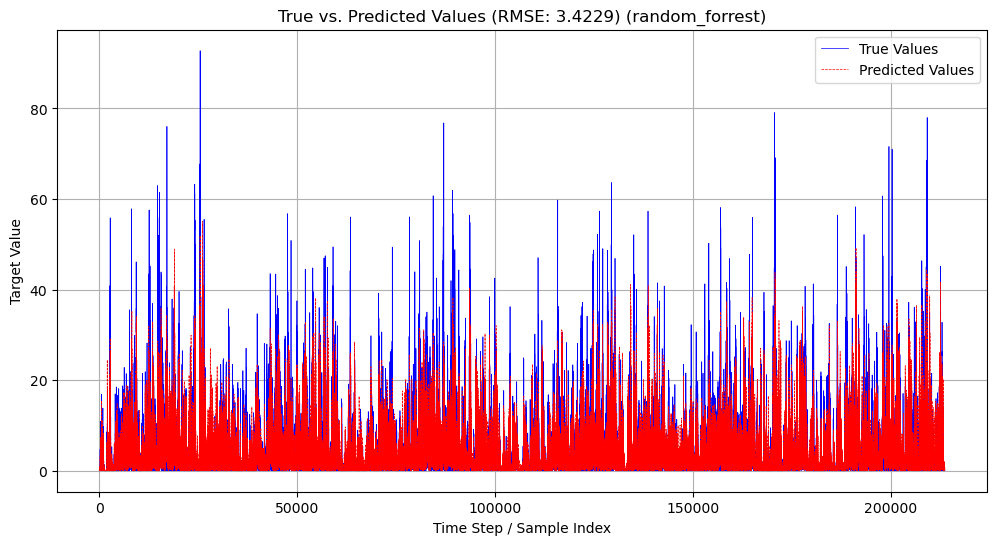

True vs. Predicted plot saved to results\true_vs_predicted_random_forrest_20251214_234520.png


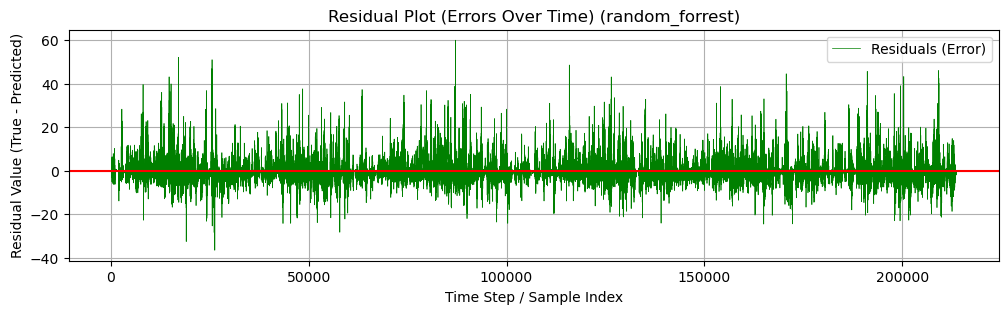

Residuals plot saved to results\residuals_plot_random_forrest_20251214_234520.png

--- Comparing Random Forrest with Baselines ---
--- Naive (t-1) Baseline Evaluation ---
--- Numerical Regression Metrics (naive_baseline) ---
Mean Squared Error (MSE): 42.1920
Root Mean Squared Error (RMSE): 6.4955
Mean Absolute Error (MAE): 3.6397
R-squared Score (R2): -0.3501
----------------------------------------
Numerical metrics saved to results\evaluation_metrics_naive_baseline_20251214_234523.json
--- ARIMA Baseline Evaluation ---
--- Numerical Regression Metrics (arima_baseline) ---
Mean Squared Error (MSE): 33.8553
Root Mean Squared Error (RMSE): 5.8185
Mean Absolute Error (MAE): 3.8905
R-squared Score (R2): -0.0833
----------------------------------------
Numerical metrics saved to results\evaluation_metrics_arima_baseline_20251214_234523.json


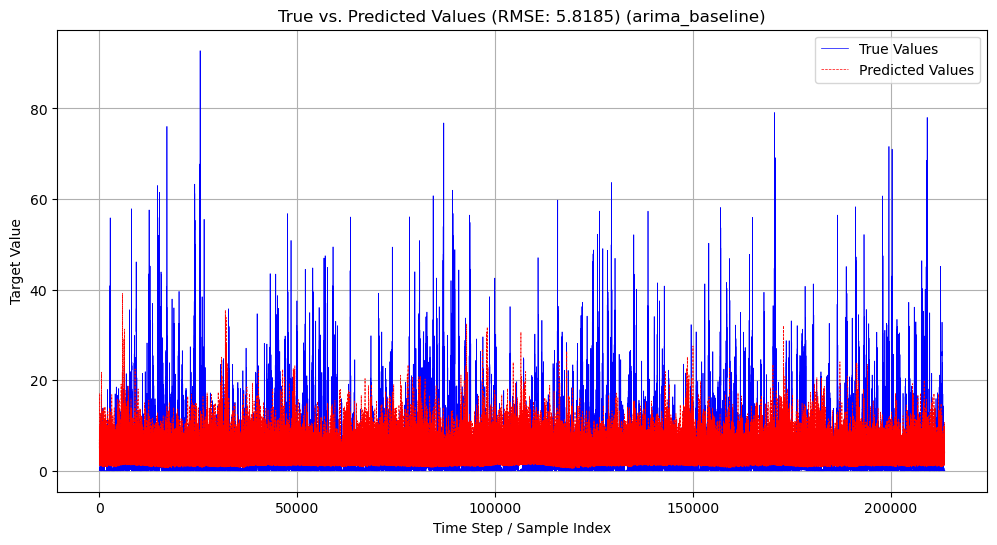

True vs. Predicted plot saved to results\true_vs_predicted_arima_baseline_20251214_234523.png


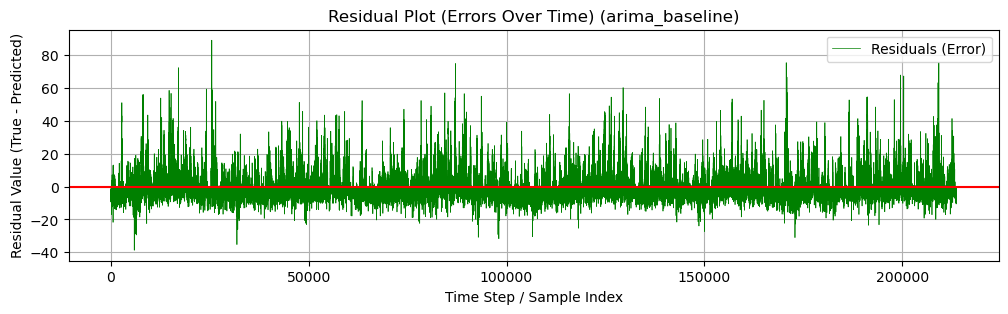

Residuals plot saved to results\residuals_plot_arima_baseline_20251214_234523.png

--- Overall Performance Comparison ---
         Model       mse     rmse      mae        r2
Random Forrest 11.716225 3.422897 1.917018  0.625091
         ARIMA 33.855292 5.818530 3.890481 -0.083340
   naive (t-1) 42.192001 6.495537 3.639684 -0.350108
--------------------------------------------------
Random Forrest evaluation metrics saved to results\Random Forrest_evaluation_metrics.csv


In [67]:
y_naive_baseline = X_test_lagged['prec_1'].values
compare_model_with_baselines("Random Forrest", y_pred_rf, y_test_lagged, y_naive_baseline, y_arima_baseline)

### XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework.

In [68]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_lagged, y_train_lagged,
              eval_set=[(X_val_lagged, y_val_lagged)],
              verbose=True) 
model_filename = 'xgboost_prec_model.joblib'
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True) 
save_path = os.path.join(model_dir, model_filename)


joblib.dump(xgb_model, save_path)




[0]	validation_0-rmse:4.98205
[1]	validation_0-rmse:4.56240
[2]	validation_0-rmse:4.29583
[3]	validation_0-rmse:4.13235
[4]	validation_0-rmse:4.04127
[5]	validation_0-rmse:3.98320
[6]	validation_0-rmse:3.93562
[7]	validation_0-rmse:3.89928
[8]	validation_0-rmse:3.86900
[9]	validation_0-rmse:3.84983
[10]	validation_0-rmse:3.83435
[11]	validation_0-rmse:3.80252
[12]	validation_0-rmse:3.78166
[13]	validation_0-rmse:3.77576
[14]	validation_0-rmse:3.76018
[15]	validation_0-rmse:3.73218
[16]	validation_0-rmse:3.71729
[17]	validation_0-rmse:3.71023
[18]	validation_0-rmse:3.70147
[19]	validation_0-rmse:3.69146
[20]	validation_0-rmse:3.67276
[21]	validation_0-rmse:3.65829
[22]	validation_0-rmse:3.64847
[23]	validation_0-rmse:3.63450
[24]	validation_0-rmse:3.62587
[25]	validation_0-rmse:3.61883
[26]	validation_0-rmse:3.60994
[27]	validation_0-rmse:3.60177
[28]	validation_0-rmse:3.59268
[29]	validation_0-rmse:3.58410
[30]	validation_0-rmse:3.57531
[31]	validation_0-rmse:3.56566
[32]	validation_0-

['saved_models\\xgboost_prec_model.joblib']

In [69]:

y_pred_xgb = xgb_model.predict(X_test_lagged)


--- Evaluation for XGBoost Regressor ---
--- Numerical Regression Metrics (xgboost_regressor) ---
Mean Squared Error (MSE): 10.3706
Root Mean Squared Error (RMSE): 3.2203
Mean Absolute Error (MAE): 1.8038
R-squared Score (R2): 0.6681
----------------------------------------
Numerical metrics saved to results\evaluation_metrics_xgboost_regressor_20251214_234634.json


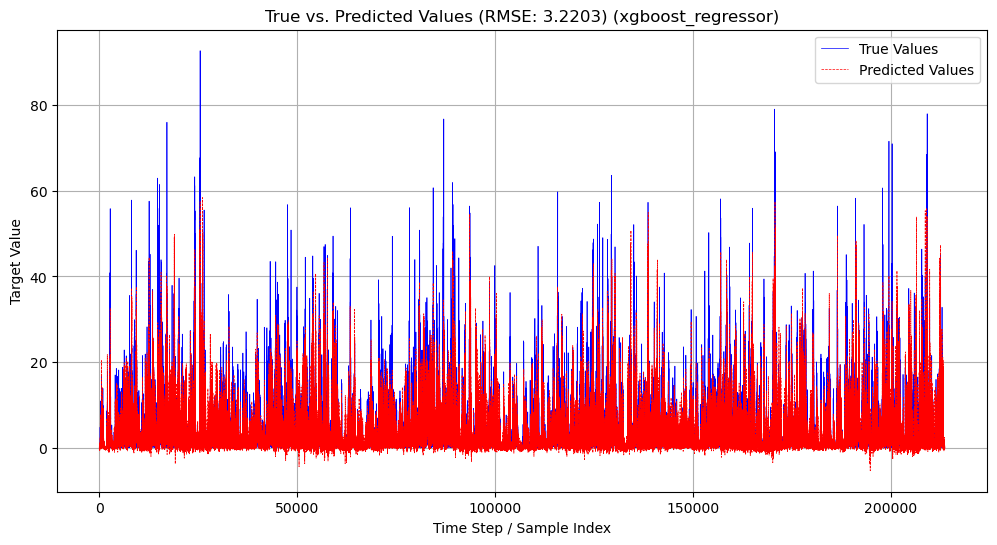

True vs. Predicted plot saved to results\true_vs_predicted_xgboost_regressor_20251214_234634.png


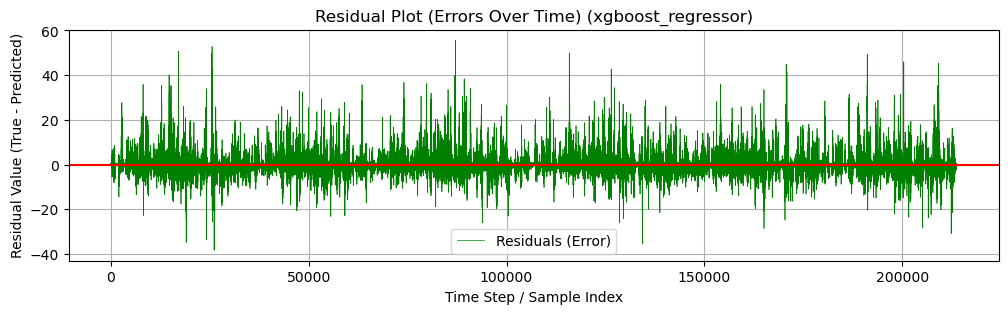

Residuals plot saved to results\residuals_plot_xgboost_regressor_20251214_234634.png

--- Comparing XGBoost Regressor with Baselines ---
--- Naive (t-1) Baseline Evaluation ---
--- Numerical Regression Metrics (naive_baseline) ---
Mean Squared Error (MSE): 42.1920
Root Mean Squared Error (RMSE): 6.4955
Mean Absolute Error (MAE): 3.6397
R-squared Score (R2): -0.3501
----------------------------------------
Numerical metrics saved to results\evaluation_metrics_naive_baseline_20251214_234639.json
--- ARIMA Baseline Evaluation ---
--- Numerical Regression Metrics (arima_baseline) ---
Mean Squared Error (MSE): 33.8553
Root Mean Squared Error (RMSE): 5.8185
Mean Absolute Error (MAE): 3.8905
R-squared Score (R2): -0.0833
----------------------------------------
Numerical metrics saved to results\evaluation_metrics_arima_baseline_20251214_234639.json


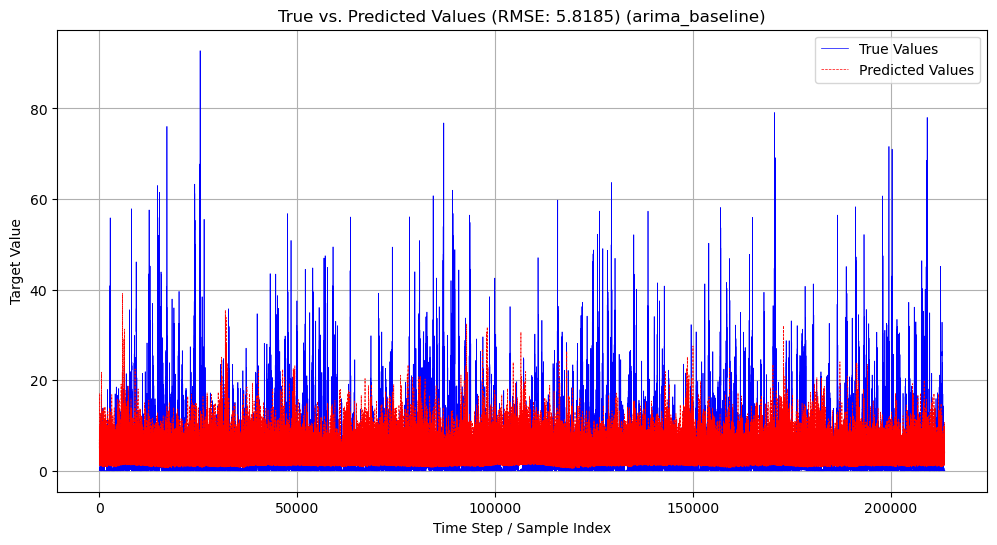

True vs. Predicted plot saved to results\true_vs_predicted_arima_baseline_20251214_234639.png


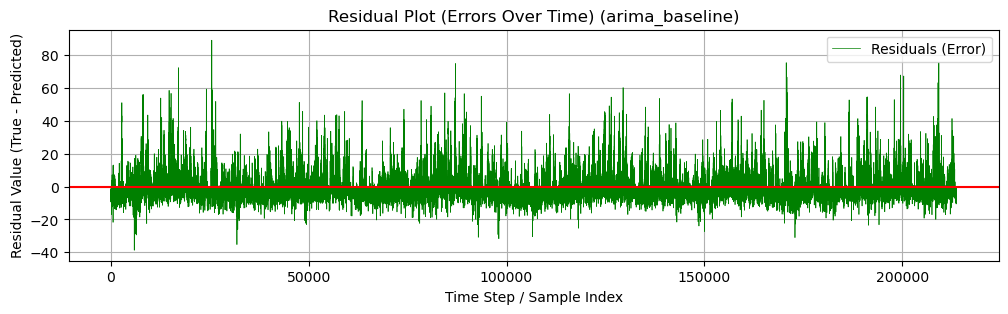

Residuals plot saved to results\residuals_plot_arima_baseline_20251214_234639.png

--- Overall Performance Comparison ---
            Model       mse     rmse      mae        r2
XGBoost Regressor 10.370603 3.220342 1.803831  0.668150
            ARIMA 33.855292 5.818530 3.890481 -0.083340
      naive (t-1) 42.192001 6.495537 3.639684 -0.350108
--------------------------------------------------
XGBoost Regressor evaluation metrics saved to results\XGBoost Regressor_evaluation_metrics.csv


In [71]:

compare_model_with_baselines("XGBoost Regressor", y_pred_xgb, y_test_lagged, y_naive_baseline, y_arima_baseline)